In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Main and side hustle

In [20]:
product_df = pd.read_csv('data/products.csv')

In [22]:
data_categories = ["Digital Commerce", "Digital Security", "Digital Knowledge Products", "Other Digital Products"]
drug_categories = ["Recreational Drugs", "Pharmaceutical Drugs"]

In [23]:
# Create a new column to identify vendors with a main business in data or drugs
product_df['main_business'] = product_df['broad_category'].apply(lambda x: 'Data' if x in data_categories else ('Drug' if x in drug_categories else 'Other'))

In [24]:
# Count the number of vendors with data and drug as their main business
product_main_count = product_df['vendor'].groupby(product_df['main_business']).nunique()

In [25]:
# To find side hustles, we need to see if vendors listed under 'Data' also sell under 'Drug' and vice versa
# Create a pivot table of vendors by their categories
vendor_category_pivot = pd.crosstab(product_df['vendor'], product_df['broad_category'])

In [26]:
# Check if a vendor sells both data and drug related products
vendor_category_pivot['Data'] = vendor_category_pivot[data_categories].sum(axis=1) > 0
vendor_category_pivot['Drug'] = vendor_category_pivot[drug_categories].sum(axis=1) > 0

In [27]:
# Count vendors who are involved in both data and drug as a side business
side_business_count = vendor_category_pivot[(vendor_category_pivot['Data'] == True) & (vendor_category_pivot['Drug'] == True)].shape[0]

product_main_count, side_business_count

(main_business
 Data    157
 Drug    355
 Name: vendor, dtype: int64,
 69)

In [28]:
# Calculate the percentages for side businesses
total_data_vendors = product_main_count['Data']
total_drug_vendors = product_main_count['Drug']
percentage_data_side_hustle = (side_business_count / total_data_vendors) * 100
percentage_drug_side_hustle = (side_business_count / total_drug_vendors) * 100

# Create print statements for the statistics
print_statements = {
    "Total Data Vendors": f"Total vendors primarily dealing with data-related products: {total_data_vendors}",
    "Total Drug Vendors": f"Total vendors primarily dealing with drug-related products: {total_drug_vendors}",
    "Total Side Business Vendors": f"Total vendors with side businesses in both domains: {side_business_count}",
    "Percentage Data Side Business": f"Percentage of data-related vendors with a side business in drugs: {percentage_data_side_hustle:.2f}%",
    "Percentage Drug Side Business": f"Percentage of drug-related vendors with a side business in data: {percentage_drug_side_hustle:.2f}%"
}

print_statements

{'Total Data Vendors': 'Total vendors primarily dealing with data-related products: 157',
 'Total Drug Vendors': 'Total vendors primarily dealing with drug-related products: 355',
 'Total Side Business Vendors': 'Total vendors with side businesses in both domains: 69',
 'Percentage Data Side Business': 'Percentage of data-related vendors with a side business in drugs: 43.95%',
 'Percentage Drug Side Business': 'Percentage of drug-related vendors with a side business in data: 19.44%'}

## Plots
- Digital Commerce: Counterfeit Items, Fraud, Services
- Digital Security: Hacking and Cybersecurity, Software & Hosting
- Digital Knowledge Products: E-Books, Guides & Tutorials
- Recreational Drugs: Cannabis & Hash, Psychedelics, Stimulants, Ecstasy, Dissociatives
- Pharmaceutical Drugs: Benzos, Opioids, Prescriptions, Steroids
- Other Digital Products: Accounts, Others

In [29]:
product_count_broad = product_df['broad_category'].value_counts()
vendor_activity = product_df.groupby(['vendor', 'broad_category']).size().unstack(fill_value=0)

/var/folders/z0/r3f28d6574z4sy1kjhxmryhm0000gn/T/ipykernel_9212/4084200098.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_count_broad.index, y=product_count_broad.values, palette="viridis")


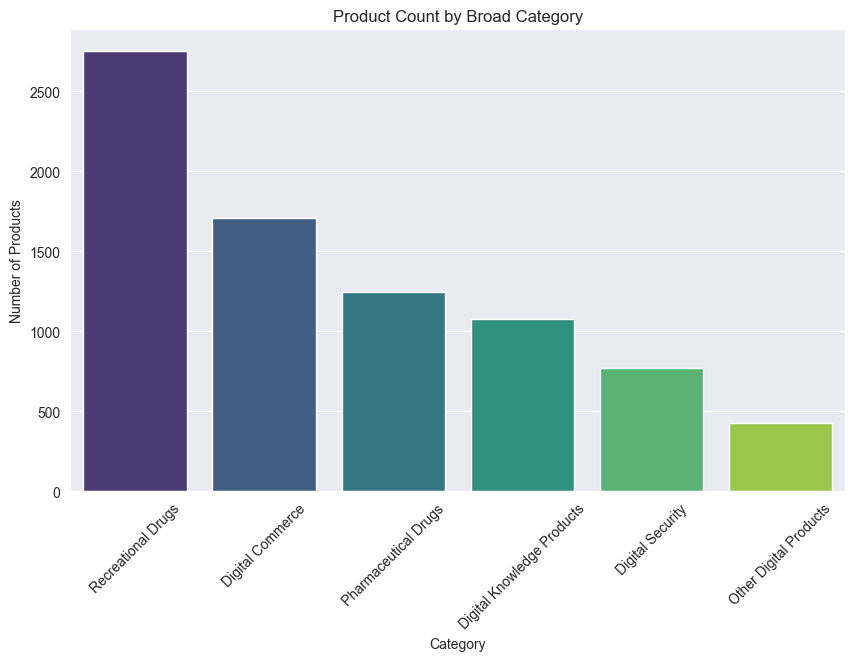

In [45]:
# Bar Chart for Product Count by Broad Category
plt.figure(figsize=(10, 6))
sns.barplot(x=product_count_broad.index, y=product_count_broad.values, palette="viridis")
plt.title('Product Count by Broad Category')
plt.ylabel('Number of Products')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

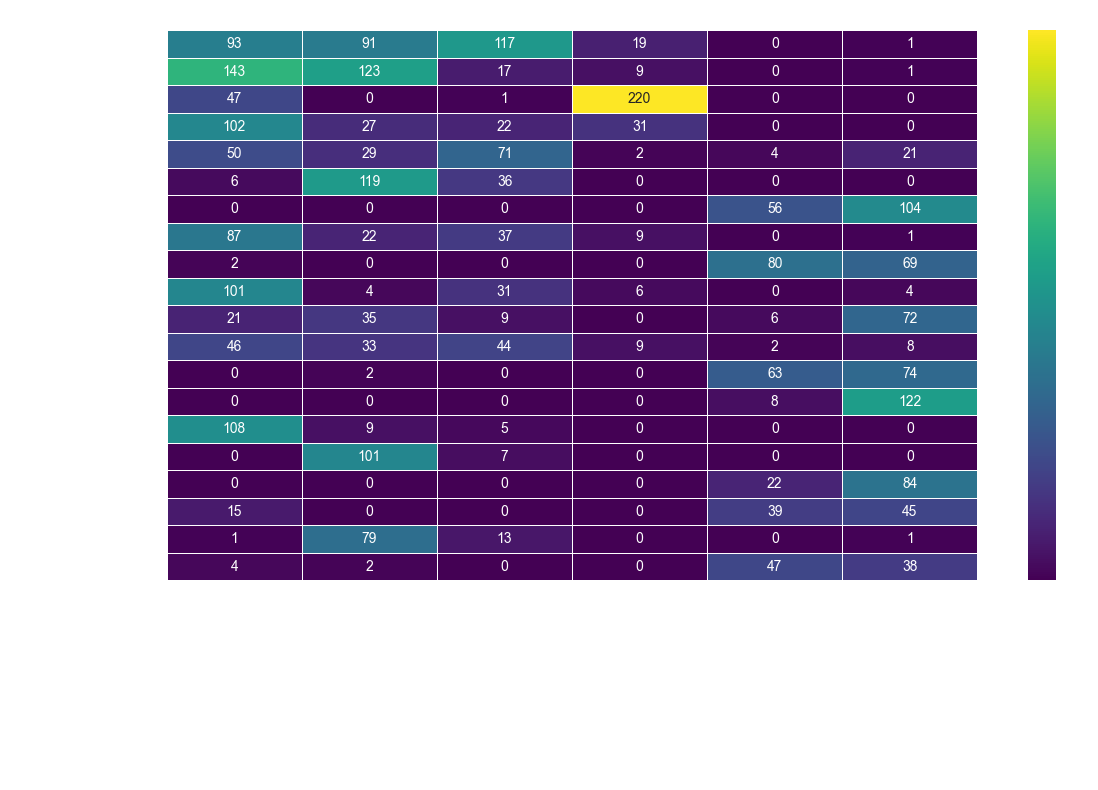

In [46]:
# Summing up the total products per vendor and sorting
vendor_activity['Total Products'] = vendor_activity.sum(axis=1)
sorted_vendors = vendor_activity.sort_values(by='Total Products', ascending=False).head(20)

# Heatmap for Top 20 Vendors by Activity
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(sorted_vendors.drop('Total Products', axis=1), annot=True, fmt="d", cmap="viridis", linewidths=.5)
# Set title and labels with white color
plt.title('Vendor Activity for Top 20 Vendors', color='white')
plt.ylabel('Vendor', color='white')
plt.xlabel('Broad Category', color='white')

# Change tick colors to white
plt.xticks(color='white')
plt.yticks(color='white')

# Change background color to #121212
plt.gca().patch.set_facecolor('#121212')

# Adjust colorbar text and ticks to white
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

# Use tight layout to adjust the plot dimensions dynamically
plt.tight_layout()

# Save as PNG with specified background color and ensure the text color is maintained
plt.savefig('assets/vendor_activity.png', facecolor='#121212', edgecolor='none')
plt.show()

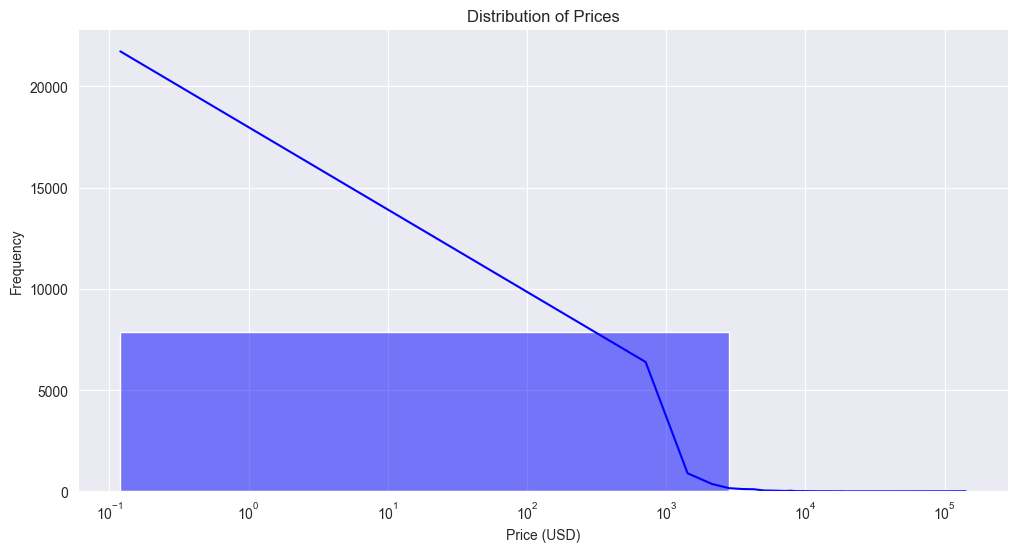

In [47]:
# Histogram to show the distribution of prices
plt.figure(figsize=(12, 6))
sns.histplot(product_df['price_usd'], bins=50, color='blue', kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.xscale('log')  # Using log scale due to wide range of prices
plt.grid(True)
plt.show()

In [48]:
# remove 'Digital Package' and 'Physical Package' from the category column, fill with None
# these categories are too broad and do not provide useful information
# we predicted the categories ourselves with a model for the broad categories
product_df['category'] = product_df['category'].apply(lambda x: x if x not in ['Digital Package', 'Physical Package'] else None)

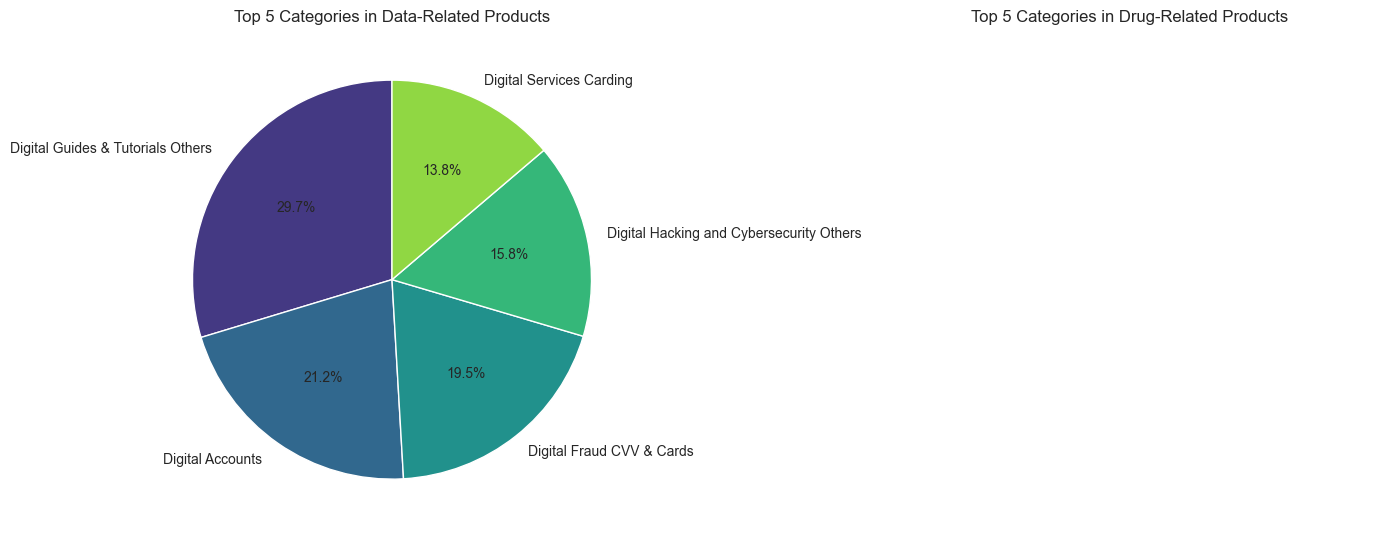

In [49]:
# Extracting top categories within Data-Related and Drug-Related products
top_data_categories = product_df[product_df['main_business'] == 'Data']['category'].value_counts().head(5)
top_drug_categories = product_df[product_df['main_business'] == 'Drug']['category'].value_counts().head(5)

# Creating pie charts for top categories
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].pie(top_data_categories.values, labels=top_data_categories.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', 5))
ax[0].set_title('Top 5 Categories in Data-Related Products')

ax[1].pie(top_drug_categories.values, labels=top_drug_categories.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('magma', 5))
ax[1].set_title('Top 5 Categories in Drug-Related Products')

plt.tight_layout()
plt.show()

/var/folders/z0/r3f28d6574z4sy1kjhxmryhm0000gn/T/ipykernel_9212/1895186874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_broad.index, y=average_price_broad.values, palette="coolwarm")


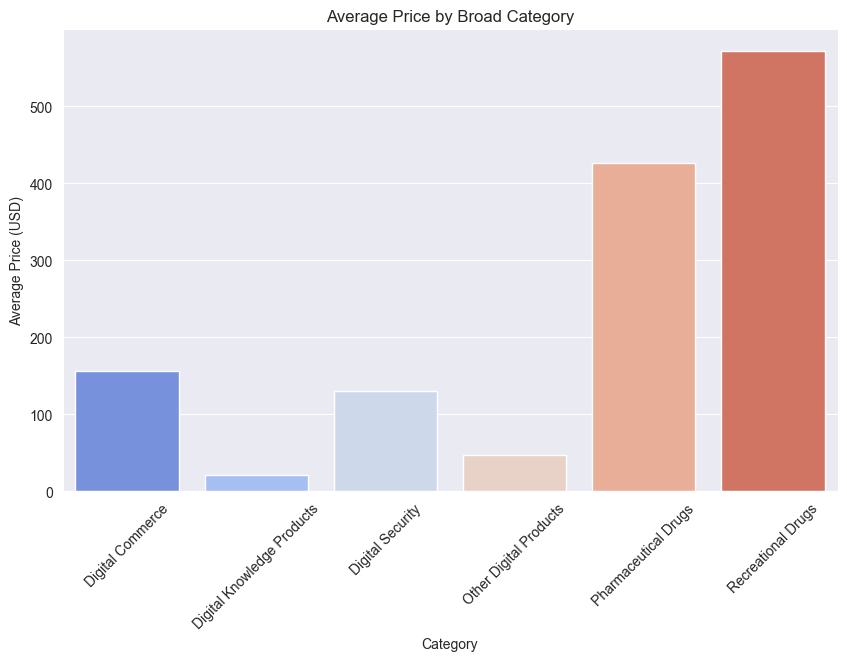

In [50]:
# Calculating average price by broad category
average_price_broad = product_df.groupby('broad_category')['price_usd'].mean()

# Bar chart for average price comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_broad.index, y=average_price_broad.values, palette="coolwarm")
plt.title('Average Price by Broad Category')
plt.ylabel('Average Price (USD)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

In [51]:
# change drug to drugs in main_business column
product_df['main_business'] = product_df['main_business'].apply(lambda x: 'Drugs' if x == 'Drug' else x)

In [53]:
product_df[['name', 'main_business', 'vendor', 'category', 'price_usd', 'broad_category']].to_csv('data/product_vendor.csv', index=False)

/var/folders/z0/r3f28d6574z4sy1kjhxmryhm0000gn/T/ipykernel_9212/309118012.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_range_count.index, y=price_range_count.values, palette="spring")


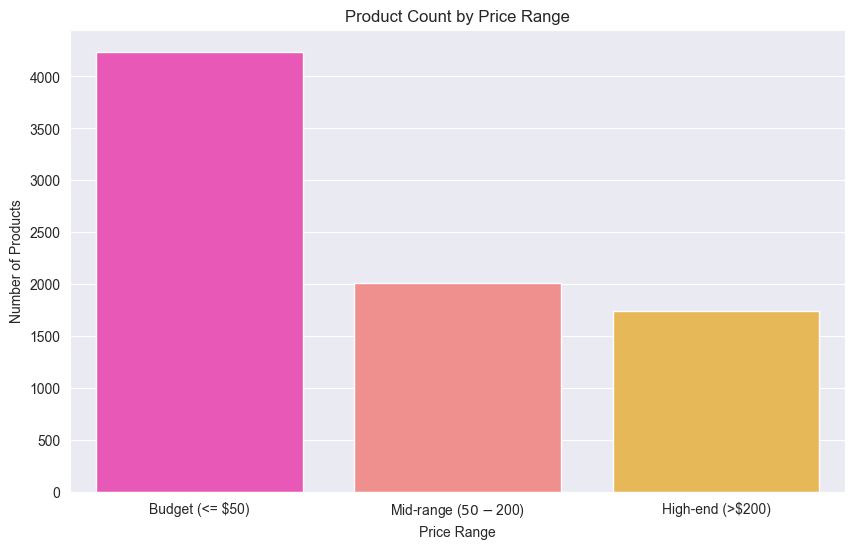

price_range
Budget (<= $50)         4238
Mid-range ($50-$200)    2011
High-end (>$200)        1739
Name: count, dtype: int64

In [55]:
# Categorizing prices into ranges
price_bins = [0, 50, 200, float('inf')]
price_labels = ['Budget (<= $50)', 'Mid-range ($50-$200)', 'High-end (>$200)']
product_df['price_range'] = pd.cut(product_df['price_usd'], bins=price_bins, labels=price_labels, right=False)

# Count of products in each price range
price_range_count = product_df['price_range'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_count.index, y=price_range_count.values, palette="spring")
plt.title('Product Count by Price Range')
plt.ylabel('Number of Products')
plt.xlabel('Price Range')
plt.show()

price_range_count

In [64]:
grouped_products = product_df.groupby(['main_business', 'broad_category', 'price_range']).size().reset_index(name='product_count')
# drop rows with product_count = 0
grouped_products = grouped_products[grouped_products['product_count'] > 0]
grouped_products.rename(columns={'broad_category': 'category'}, inplace=True)
grouped_products.to_csv('data/products_grouped.csv', index=False)

/var/folders/z0/r3f28d6574z4sy1kjhxmryhm0000gn/T/ipykernel_9212/2316051064.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_products = product_df.groupby(['main_business', 'broad_category', 'price_range']).size().reset_index(name='product_count')


In [61]:
product_df

,name,category,price_usd,description,vendor,marketplace,category_cleaned,broad_category,main_business,price_range
0,I will teach you Defi flash loan attack method...,Digital Guides & Tutorials Fraud,55.00,This listing is all about the business of frau...,cashapp,nexus,Digital Guides & Tutorials Fraud,Digital Knowledge Products,Data,Mid-range ($50-$200)
1,15 PROFESSIONAL CARDERS CARDING TIPS TO FOLLOW,Digital Services Carding,18.00,15 PROFESSIONAL CARDERS CARDING TIPS TO FOLLOW...,BadBreed,nexus,Digital Services Carding,Digital Commerce,Data,Budget (<= $50)
2,WEED PINK ROSAY,Cannabis & Hash Buds & Flowers,32.20,Salut tout le monde !!\n\nC'est la TEAM-FRENCH...,FRENCHCANNA,nexus,Cannabis & Hash Buds & Flowers,Recreational Drugs,Drugs,Budget (<= $50)
3,Zopiclone 7.5mg x 56 Tablets,Benzos Pills,56.16,Boxed Pharmacy grade Zopiclone 7.5mg x 56 Tablets,PharmaUK,nexus,Benzos Pills,Pharmaceutical Drugs,Drugs,Mid-range ($50-$200)
4,1g * High Quality (Racemic) Ketamine No Dissap...,Dissociatives Ketamine,111.94,Youll enjoy your High Quality (Racemic) Ketami...,RockToDoor,nexus,Dissociatives Ketamine,Recreational Drugs,Drugs,Mid-range ($50-$200)
...,...,...,...,...,...,...,...,...,...,...
7983,3.5G HF Cocaine HCL - FTIR Tested Clean - Sing...,None,137.72,Here at HeadFuzzies we have very stringent qua...,headfuzzies,WeTheNorth,Physical Package,Recreational Drugs,Drugs,Mid-range ($50-$200)
7984,1000 ICE SPEED BARS 40MG,None,497.32,💊💊💊💊💊💊💊💊💊💊💊💊💊💊💊💊\nIce bars speed ** Really str...,xancan,WeTheNorth,Physical Package,Recreational Drugs,Drugs,High-end (>$200)
7985,7g High Heat Un-Cut Colombia Cocaine,None,621.27,High quality fishscale cocaine. Our review sho...,canadagoodies,WeTheNorth,Physical Package,Recreational Drugs,Drugs,High-end (>$200)
7986,Riverbell Casino Freshly Hacked DB 250K entrie...,None,918.14,Riverbelle Casino Canada Obtained less than 30...,goatchick,WeTheNorth,Digital Package,Digital Commerce,Data,High-end (>$200)


In [63]:
grouped_products

,main_business,broad_category,price_range,product_count
0,Data,Digital Commerce,Budget (<= $50),1164
1,Data,Digital Commerce,Mid-range ($50-$200),376
2,Data,Digital Commerce,High-end (>$200),172
3,Data,Digital Knowledge Products,Budget (<= $50),1007
4,Data,Digital Knowledge Products,Mid-range ($50-$200),52
5,Data,Digital Knowledge Products,High-end (>$200),18
6,Data,Digital Security,Budget (<= $50),589
7,Data,Digital Security,Mid-range ($50-$200),126
8,Data,Digital Security,High-end (>$200),58
9,Data,Other Digital Products,Budget (<= $50),372


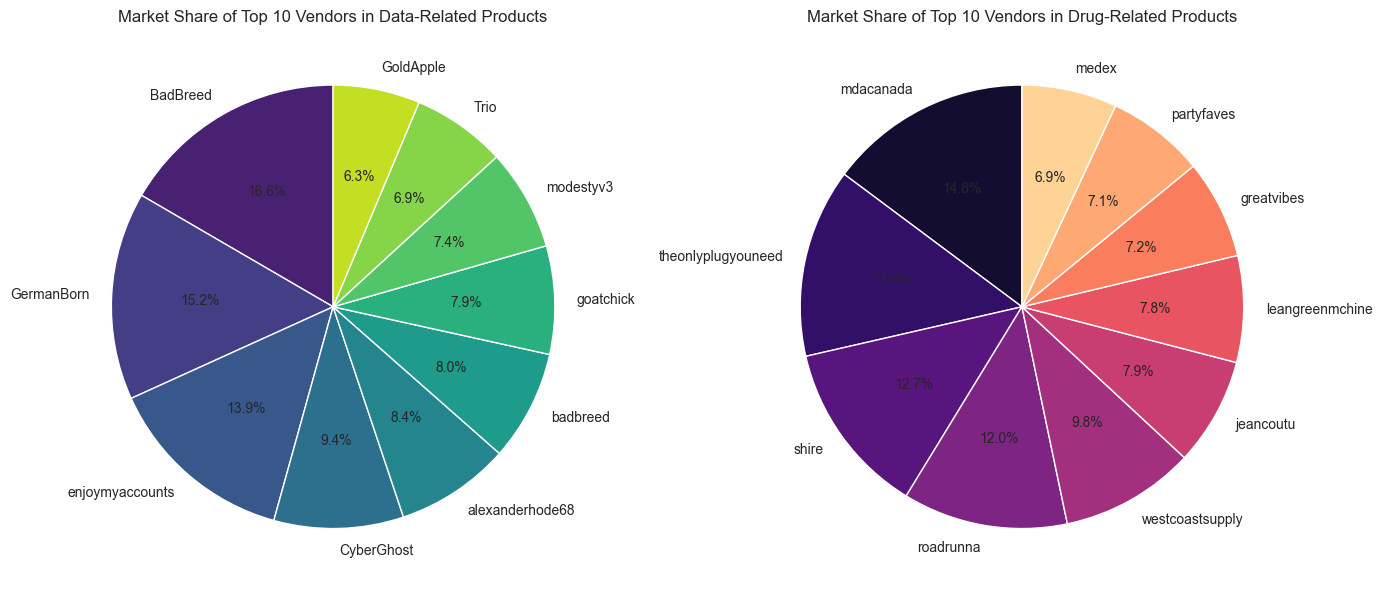

(vendor
 BadBreed           320
 GermanBorn         292
 enjoymyaccounts    268
 CyberGhost         182
 alexanderhode68    161
 badbreed           155
 goatchick          152
 modestyv3          142
 Trio               132
 GoldApple          122
 Name: count, dtype: int64,
 vendor
 mdacanada             160
 theonlyplugyouneed    149
 shire                 137
 roadrunna             130
 westcoastsupply       106
 jeancoutu              85
 leangreenmchine        84
 greatvibes             78
 partyfaves             77
 medex                  75
 Name: count, dtype: int64)

In [21]:
# Calculating market share for top 10 vendors in Data-Related and Drug-Related categories
top_vendors_data = product_df[product_df['main_business'] == 'Data']['vendor'].value_counts().head(10)
top_vendors_drugs = product_df[product_df['main_business'] == 'Drug']['vendor'].value_counts().head(10)

# Calculate percentages
total_data_products = top_vendors_data.sum()
total_drug_products = top_vendors_drugs.sum()
top_vendors_data_share = (top_vendors_data / total_data_products) * 100
top_vendors_drugs_share = (top_vendors_drugs / total_drug_products) * 100

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(top_vendors_data_share, labels=top_vendors_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', 10))
axes[0].set_title('Market Share of Top 10 Vendors in Data-Related Products')

axes[1].pie(top_vendors_drugs_share, labels=top_vendors_drugs.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('magma', 10))
axes[1].set_title('Market Share of Top 10 Vendors in Drug-Related Products')

plt.tight_layout()
plt.show()

(top_vendors_data, top_vendors_drugs)

## Reviews

In [22]:
review_df = pd.read_csv('data/reviews.csv')

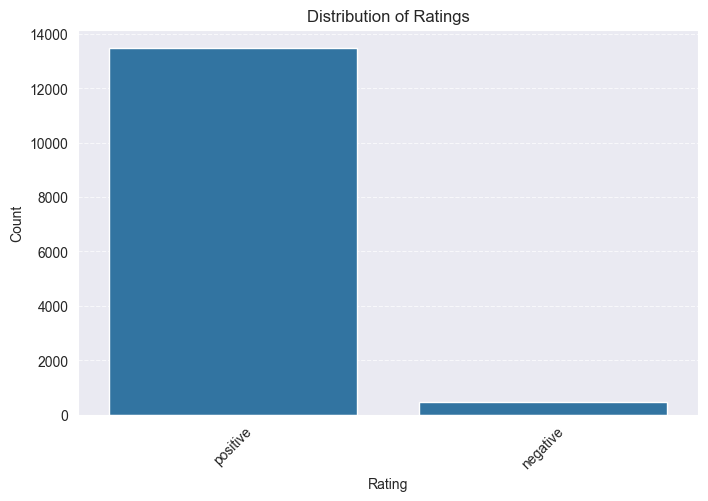

In [23]:
# Ensure the 'rating' column is treated as a categorical variable
review_df['rating'] = review_df['rating'].astype('category')

# Plotting the distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=review_df, order=review_df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

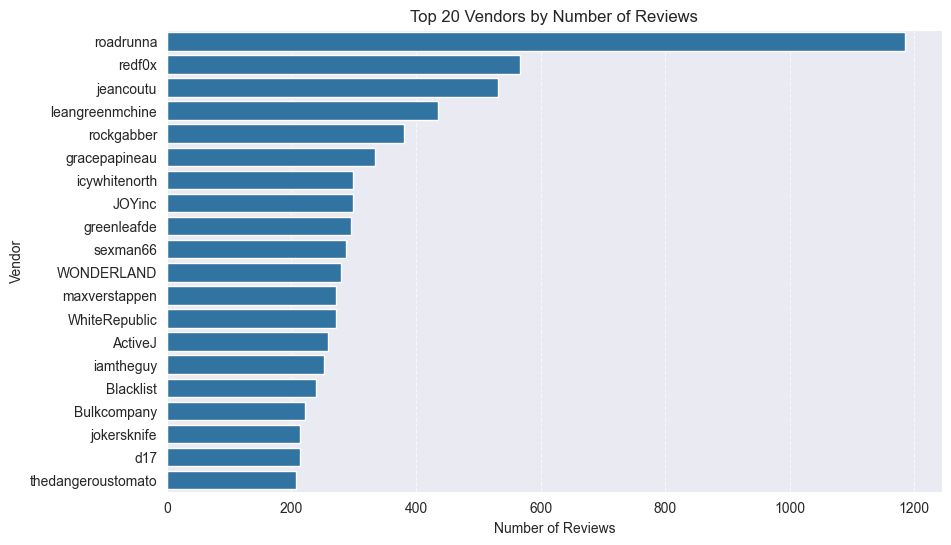

In [24]:
# Plotting the number of reviews per vendor
vendor_counts = review_df['vendor'].value_counts().head(20)  # Top 20 vendors
plt.figure(figsize=(10, 6))
sns.barplot(y=vendor_counts.index, x=vendor_counts.values, orient='h')
plt.title('Top 20 Vendors by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Vendor')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

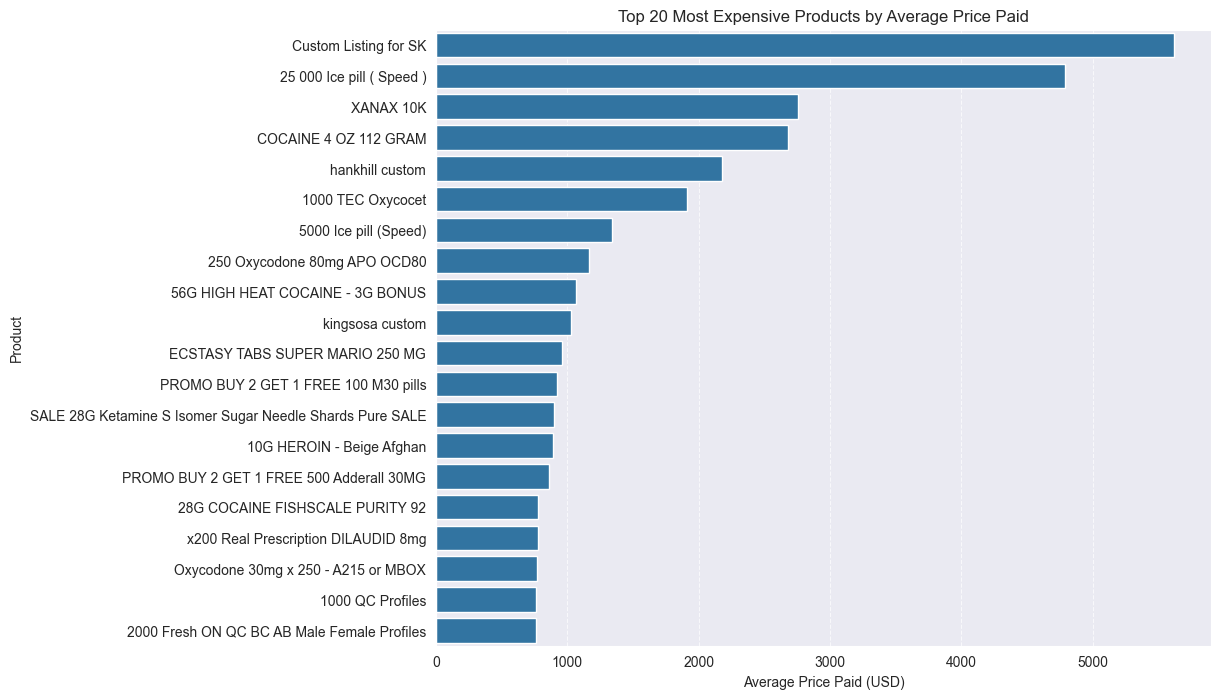

In [25]:
cleaned_data = review_df.dropna(subset=['price_paid_usd'])

# Grouping data by product and calculating the average price paid per product
average_price_per_product = cleaned_data.groupby('product')['price_paid_usd'].mean().sort_values(ascending=False).head(20)

# Plotting the average price paid per top 20 most expensive products
plt.figure(figsize=(10, 8))
sns.barplot(y=average_price_per_product.index, x=average_price_per_product.values, orient='h')
plt.title('Top 20 Most Expensive Products by Average Price Paid')
plt.xlabel('Average Price Paid (USD)')
plt.ylabel('Product')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

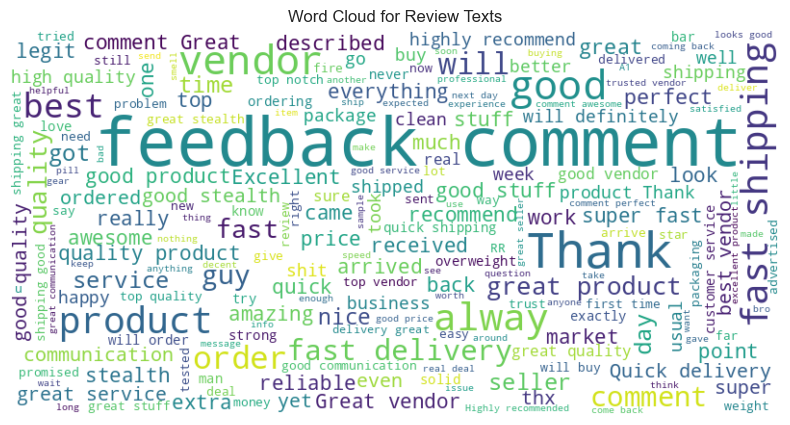

In [26]:
text = ' '.join(review for review in review_df['text'].dropna())

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.title('Word Cloud for Review Texts')
plt.show()

## Vendors

In [41]:
vendor_df = pd.read_csv('data/vendors.csv')

In [42]:
vendor_df

,name,about_text,review_count,marketplace,review_count_normalized
0,ausnarcoslord,Our Goal is to satisfied our clients.,10,nexus,0.001186
1,ActiveJ,==============================================...,211,nexus,0.025018
2,Broker01,Good seller $_$\n\nOnly fair deals\nDiscounts ...,4,nexus,0.000474
3,Vamino,WELCOME TO VAMINO's WORLD..THE BEST YOU CAN FI...,2,nexus,0.000237
4,pinkcard,"A cordial greeting friend, if you are here it ...",4,nexus,0.000474
...,...,...,...,...,...
439,thatguyfromtheblock7,WELCOME TO OUR STORE\nWe are bilangual FR and ...,0,WeTheNorth,0.000000
440,skyshin,A long time ago I worked for the telephone com...,0,WeTheNorth,0.000000
441,thebtcteam,The original thebitcointeam from canadahq and ...,0,WeTheNorth,0.000000
442,drgreen,"Hello everyone , i am here to provide you the ...",0,WeTheNorth,0.000000


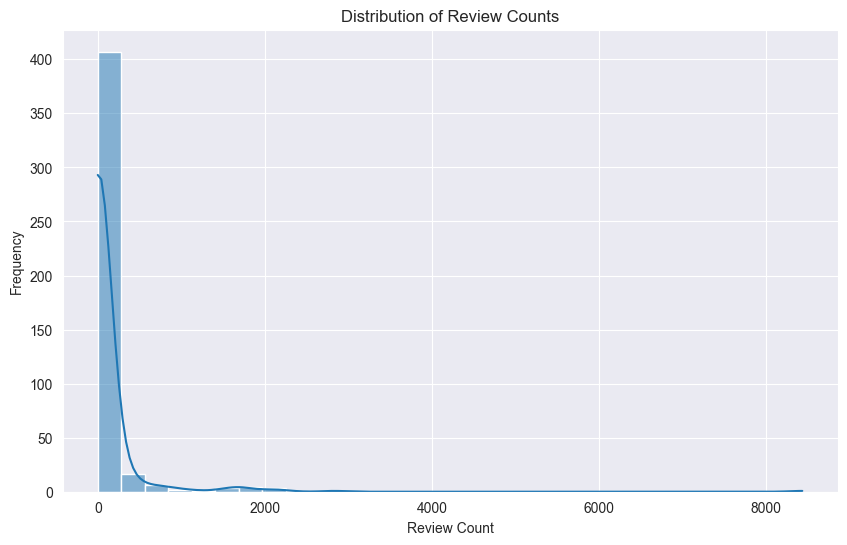

In [28]:
# Distribution of review counts
plt.figure(figsize=(10, 6))
sns.histplot(vendor_df['review_count'], bins=30, kde=True)
plt.title('Distribution of Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.grid(True)

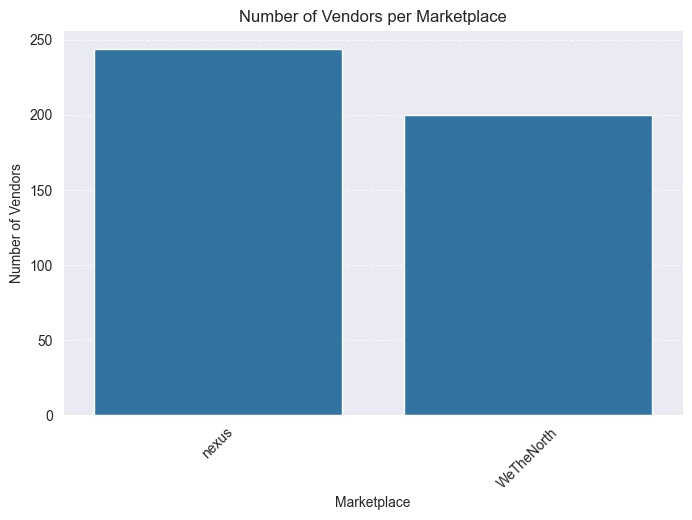

In [29]:
marketplace_counts = vendor_df['marketplace'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=marketplace_counts.index, y=marketplace_counts.values)
plt.title('Number of Vendors per Marketplace')
plt.xlabel('Marketplace')
plt.ylabel('Number of Vendors')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


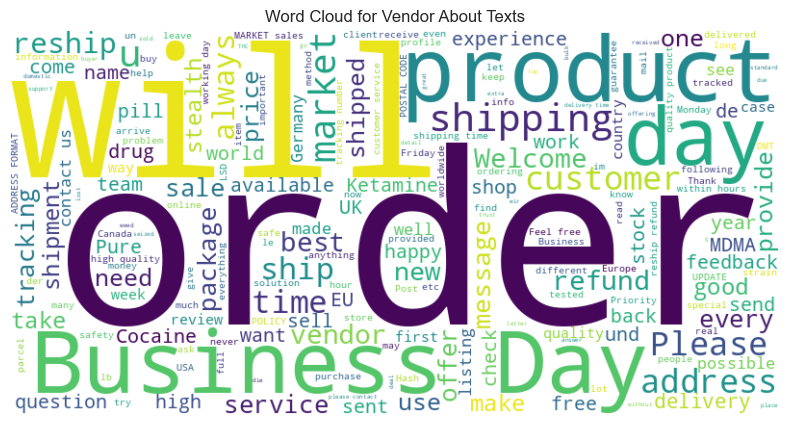

In [30]:
about_text_combined = ' '.join(text for text in vendor_df['about_text'].dropna())

# Generate a word cloud image for the about_text
wordcloud_about = WordCloud(width=800, height=400, background_color='white').generate(about_text_combined)

# Display the word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_about, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.title('Word Cloud for Vendor About Texts')
plt.show()